# one week project machine learning

## get dataset

In [1]:
!wget "https://github.com/farisi55/ml-spaceship-titanic/raw/main/spaceship-titanic.zip"
!unzip spaceship-titanic.zip
!rm spaceship-titanic.zip

--2024-03-11 08:33:45--  https://github.com/farisi55/ml-spaceship-titanic/raw/main/spaceship-titanic.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/farisi55/ml-spaceship-titanic/main/spaceship-titanic.zip [following]
--2024-03-11 08:33:45--  https://raw.githubusercontent.com/farisi55/ml-spaceship-titanic/main/spaceship-titanic.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306403 (299K) [application/zip]
Saving to: ‘spaceship-titanic.zip’

spaceship-titanic.z 100%[===================>] 299.22K  --.-KB/s    in 0.03s   

2024-03-11 08:33:45 (8.36 MB/s) - ‘spaceship-titanic.zip’ saved [30

## explore dataset

In [2]:
import pandas as pd

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| PassengerId | A unique Id for each passenger gggg indicates a group the passenger is travelling with and pp is their number within the group |                             |
| HomePlanet    | The planet the passenger departed from, typically their planet of permanent residence|
| CryoSleep     | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins|                                                |
| Cabin       | The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard|                                                |
| Destination     | The planet the passenger will be debarking to|                                                |
| Age     | The age of the passenger. |                                                |
| VIP    | Whether the passenger has paid for special VIP service during the voyage.|                                                |
| RoomService     | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities|                                                |
| FoodCourt     | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities|         
| ShoppingMall     | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities|         
| Spa     | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities|         
| VRDeck      | Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities|         
| Name     | The first and last names of the passenger.|                                                |
| Transported | Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict                        | C |

## data train

In [3]:
train_df = pd.read_csv("./train.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## data preparation

In [6]:
feature_cols = ['CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_col = 'Transported'

In [71]:
train_features = train_df[feature_cols].copy()
train_target = train_df[target_col].copy()

## split data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=42, stratify=train_target)

In [9]:
y_train.value_counts()

True     3502
False    3452
Name: Transported, dtype: int64

In [10]:
y_test.value_counts()

True     876
False    863
Name: Transported, dtype: int64

## Fill missing value with Imputer

#### Age

In [11]:
X_train['Age'].describe()

count    6815.000000
mean       28.683786
std        14.497439
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [12]:
X_train['Age'].mode()

0    24.0
Name: Age, dtype: float64

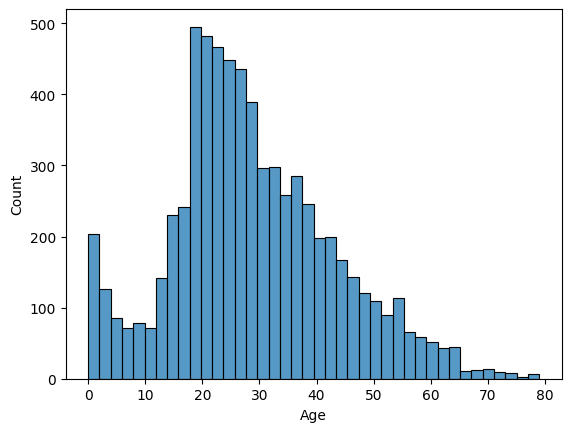

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(X_train, x='Age')
plt.show()

In [14]:
from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='median')
new_age = age_imputer.fit_transform(X_train[['Age']]).flatten()

In [15]:
X_train['Age'] = new_age

#### RoomService   

In [16]:
X_train['RoomService'].describe()

count     6809.000000
mean       230.149508
std        676.338160
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      14327.000000
Name: RoomService, dtype: float64

In [17]:
X_train['RoomService'].mode()

0    0.0
Name: RoomService, dtype: float64

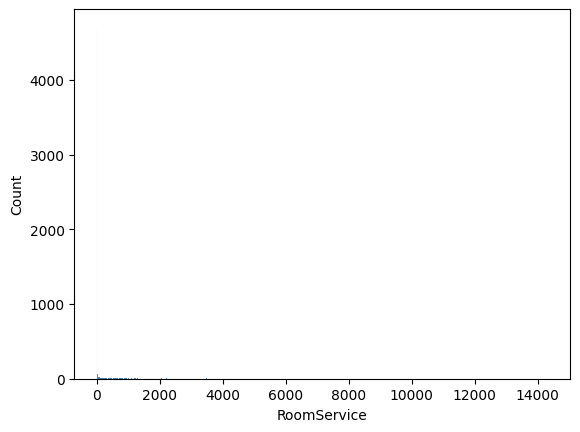

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(X_train, x='RoomService')
plt.show()

In [19]:
from sklearn.impute import SimpleImputer

roomservice_imputer = SimpleImputer(strategy='most_frequent')
new_roomservice = roomservice_imputer.fit_transform(X_train[['RoomService']]).flatten()

In [20]:
X_train['RoomService'] = new_roomservice

#### FoodCourt     

In [21]:
X_train['FoodCourt'].describe()

count     6800.000000
mean       452.611176
std       1602.465410
min          0.000000
25%          0.000000
50%          0.000000
75%         65.500000
max      29813.000000
Name: FoodCourt, dtype: float64

In [22]:
X_train['FoodCourt'].mode()

0    0.0
Name: FoodCourt, dtype: float64

In [23]:
from sklearn.impute import SimpleImputer

foodcourt_imputer = SimpleImputer(strategy='most_frequent')
new_foodcourt = foodcourt_imputer.fit_transform(X_train[['FoodCourt']]).flatten()

In [24]:
X_train['FoodCourt'] = new_foodcourt

#### ShoppingMall  

In [25]:
X_train['ShoppingMall'].describe()

count     6785.000000
mean       170.033604
std        548.753286
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max      12253.000000
Name: ShoppingMall, dtype: float64

In [26]:
X_train['ShoppingMall'].mode()

0    0.0
Name: ShoppingMall, dtype: float64

In [27]:
from sklearn.impute import SimpleImputer

shoppingmall_imputer = SimpleImputer(strategy='most_frequent')
new_shoppingmall = shoppingmall_imputer.fit_transform(X_train[['ShoppingMall']]).flatten()

In [28]:
X_train['ShoppingMall'] = new_shoppingmall

#### Spa           

In [29]:
X_train['Spa'].describe()

count     6804.000000
mean       308.868460
std       1142.118125
min          0.000000
25%          0.000000
50%          0.000000
75%         55.000000
max      22408.000000
Name: Spa, dtype: float64

In [30]:
X_train['Spa'].mode()

0    0.0
Name: Spa, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer

spa_imputer = SimpleImputer(strategy='most_frequent')
new_spa = spa_imputer.fit_transform(X_train[['Spa']]).flatten()

In [32]:
X_train['Spa'] = new_spa

#### VRDeck        

In [33]:
X_train['VRDeck'].describe()

count     6810.000000
mean       296.649927
std       1108.581827
min          0.000000
25%          0.000000
50%          0.000000
75%         42.000000
max      20336.000000
Name: VRDeck, dtype: float64

In [34]:
X_train['VRDeck'].mode()

0    0.0
Name: VRDeck, dtype: float64

In [35]:
from sklearn.impute import SimpleImputer

vrdeck_imputer = SimpleImputer(strategy='most_frequent')
new_vrdeck = vrdeck_imputer.fit_transform(X_train[['VRDeck']]).flatten()

In [36]:
X_train['VRDeck'] = new_vrdeck

#### CryoSleep     

In [37]:
X_train['CryoSleep'].mode()

0    False
Name: CryoSleep, dtype: object

In [38]:
from sklearn.impute import SimpleImputer

cryosleep_imputer = SimpleImputer(strategy='most_frequent')
new_cryosleep = cryosleep_imputer.fit_transform(X_train[['CryoSleep']]).flatten()

In [39]:
X_train['CryoSleep'] = new_cryosleep

#### Destination   

In [40]:
X_train['Destination'].mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [41]:
from sklearn.impute import SimpleImputer

destination_imputer = SimpleImputer(strategy='most_frequent')
new_destination = destination_imputer.fit_transform(X_train[['Destination']]).flatten()

In [42]:
X_train['Destination'] = new_destination

#### VIP

In [43]:
X_train['VIP'].mode()

0    False
Name: VIP, dtype: object

In [44]:
from sklearn.impute import SimpleImputer

vip_imputer = SimpleImputer(strategy='most_frequent')
new_vip = vip_imputer.fit_transform(X_train[['VIP']]).flatten()

In [45]:
X_train['VIP'] = new_vip

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 3600 to 7925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     6954 non-null   object 
 1   Destination   6954 non-null   object 
 2   Age           6954 non-null   float64
 3   VIP           6954 non-null   object 
 4   RoomService   6954 non-null   float64
 5   FoodCourt     6954 non-null   float64
 6   ShoppingMall  6954 non-null   float64
 7   Spa           6954 non-null   float64
 8   VRDeck        6954 non-null   float64
dtypes: float64(6), object(3)
memory usage: 543.3+ KB


## label encoding

### CryoSleep     

In [47]:
from sklearn.preprocessing import LabelEncoder

cryosleep_labenc = LabelEncoder()
cryosleep_encoded = cryosleep_labenc.fit_transform(X_train['CryoSleep'])

In [48]:
X_train['CryoSleep'] = cryosleep_encoded

### Destination

In [49]:
from sklearn.preprocessing import LabelEncoder

destination_labenc = LabelEncoder()
destination_encoded = destination_labenc.fit_transform(X_train['Destination'])

In [50]:
X_train['Destination'] = destination_encoded

### VIP

In [51]:
from sklearn.preprocessing import LabelEncoder

vip_labenc = LabelEncoder()
vip_encoded = vip_labenc.fit_transform(X_train['VIP'])

In [52]:
X_train['VIP'] = vip_encoded

In [53]:
X_train.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3600,0,2,0.0,0,0.0,0.0,0.0,0.0,0.0
1262,1,2,17.0,0,0.0,0.0,0.0,0.0,0.0
8612,0,1,35.0,0,0.0,0.0,0.0,0.0,0.0
5075,1,0,26.0,0,0.0,0.0,0.0,0.0,0.0
4758,0,2,13.0,0,0.0,0.0,60.0,1.0,5147.0


## preparing test data

In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 3586 to 4135
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     1690 non-null   object 
 1   Destination   1710 non-null   object 
 2   Age           1699 non-null   float64
 3   VIP           1694 non-null   object 
 4   RoomService   1703 non-null   float64
 5   FoodCourt     1710 non-null   float64
 6   ShoppingMall  1700 non-null   float64
 7   Spa           1706 non-null   float64
 8   VRDeck        1695 non-null   float64
dtypes: float64(6), object(3)
memory usage: 135.9+ KB


In [55]:
test_new_cryrosleep = cryosleep_imputer.transform(X_test[['CryoSleep']]).flatten()
X_test['CryoSleep'] = test_new_cryrosleep

test_cryosleep_encoded = cryosleep_labenc.transform(X_test['CryoSleep'])
X_test['CryoSleep'] = test_cryosleep_encoded

In [56]:
test_new_destination = destination_imputer.transform(X_test[['Destination']]).flatten()
X_test['Destination'] = test_new_destination

test_destination_encoded = destination_labenc.transform(X_test['Destination'])
X_test['Destination'] = test_destination_encoded

In [57]:
test_new_vip = vip_imputer.transform(X_test[['VIP']]).flatten()
X_test['VIP'] = test_new_vip

test_vip_encoded = vip_labenc.transform(X_test['VIP'])
X_test['VIP'] = test_vip_encoded

In [58]:
test_new_age = age_imputer.transform(X_test[['Age']]).flatten()
X_test['Age'] = test_new_age

In [59]:
test_new_roomservice = roomservice_imputer.transform(X_test[['RoomService']]).flatten()
X_test['RoomService'] = test_new_roomservice

In [60]:
test_new_foodcourt = foodcourt_imputer.transform(X_test[['FoodCourt']]).flatten()
X_test['FoodCourt'] = test_new_foodcourt

In [61]:
test_new_shoppingmall = shoppingmall_imputer.transform(X_test[['ShoppingMall']]).flatten()
X_test['ShoppingMall'] = test_new_shoppingmall

In [62]:
test_new_spa = spa_imputer.transform(X_test[['Spa']]).flatten()
X_test['Spa'] = test_new_spa

In [63]:
test_new_vrdeck = vrdeck_imputer.transform(X_test[['VRDeck']]).flatten()
X_test['VRDeck'] = test_new_vrdeck

In [64]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 3586 to 4135
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     1739 non-null   int64  
 1   Destination   1739 non-null   int64  
 2   Age           1739 non-null   float64
 3   VIP           1739 non-null   int64  
 4   RoomService   1739 non-null   float64
 5   FoodCourt     1739 non-null   float64
 6   ShoppingMall  1739 non-null   float64
 7   Spa           1739 non-null   float64
 8   VRDeck        1739 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 135.9 KB


In [65]:
X_test.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3586,1,0,34.0,0,0.0,0.0,0.0,0.0,0.0
7173,1,2,4.0,0,0.0,0.0,0.0,0.0,0.0
8559,0,2,25.0,0,410.0,32.0,14.0,1239.0,10.0
6528,0,2,12.0,0,0.0,0.0,0.0,0.0,0.0
7934,0,0,66.0,1,0.0,1828.0,1.0,1873.0,45.0


## Training Model

### KKN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [74]:
knn_pred = knn.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [76]:
print(accuracy_score(y_test, knn_pred))
print(f1_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

0.7630822311673375
0.7721238938053098
              precision    recall  f1-score   support

       False       0.78      0.73      0.75       863
        True       0.75      0.80      0.77       876

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

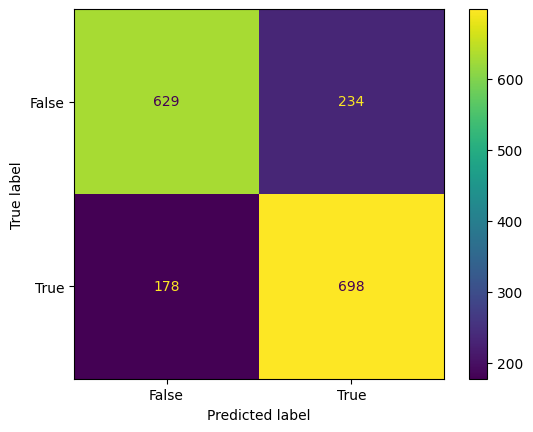

In [78]:
knn_cm = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
disp.plot()
plt.show()

### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
dtree_pred = dtree.predict(X_test)

In [81]:
print(accuracy_score(y_test, dtree_pred))
print(f1_score(y_test, dtree_pred))
print(classification_report(y_test, dtree_pred))

0.7400805060379528
0.7556756756756756
              precision    recall  f1-score   support

       False       0.77      0.68      0.72       863
        True       0.72      0.80      0.76       876

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



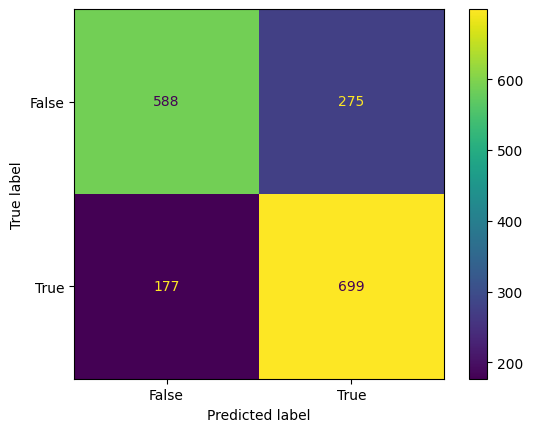

In [82]:
dtree_cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
dtree_disp = ConfusionMatrixDisplay(dtree_cm, display_labels=dtree.classes_)
dtree_disp.plot()
plt.show()

### SVM

In [83]:
from sklearn.svm import SVC

In [84]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [85]:
svc_pred = svc.predict(X_test)

In [86]:
print(accuracy_score(y_test, svc_pred))
print(f1_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

0.7918343875790684
0.8088701161562829
              precision    recall  f1-score   support

       False       0.85      0.71      0.77       863
        True       0.75      0.87      0.81       876

    accuracy                           0.79      1739
   macro avg       0.80      0.79      0.79      1739
weighted avg       0.80      0.79      0.79      1739



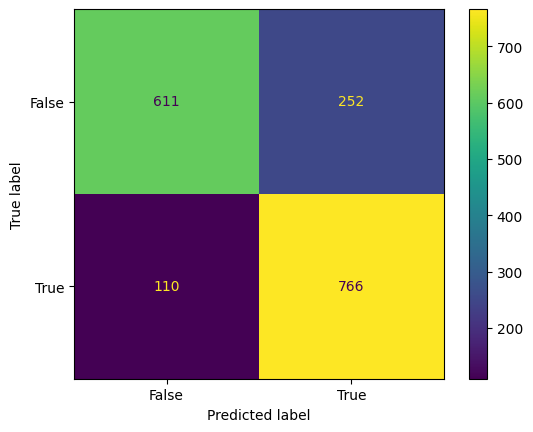

In [87]:
svc_cm = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
svc_disp = ConfusionMatrixDisplay(svc_cm, display_labels=svc.classes_)
svc_disp.plot()
plt.show()